# K Means Clustering

Problem Statement - To classify the 'Spending score' class of used dataset Mall_Customers.csv.

K-Means Clustering, an Unsupervised Learning algorithm is used for classification.

Steps involved in K Means Clustering
1. Initialize two examples of the training data set as Centroids using Kmeans++ or random initialization
2. Loop over the num of iterations to perform the clustering. 
3. For each training example compute the EUCLIDIAN DISTANCE from the centroid and assign the cluster
   based on the minimal distance.
4. Adjust the centroid of each cluster by taking the average of all the training examples which belonged 
   to that cluster on the basis of the computations performed in step 3
5. Iterate the process until each data point gets fixed to a particular cluster.

In [46]:
#import basic libraries to convert data in array, read csv file, and plotting.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

Generating function for our Kmeans Algorithm

In [47]:
import numpy as np
import random as rd
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
 # WCSS is Within Cluster Sum of Squares   
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

Visualising the dataset Mall_Customers.csv 

In [48]:
dataset=pd.read_csv('Mall_Customers.csv')

In [49]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Taking value of features Annual Income and Spending Score in an array defined as 'X'

In [50]:
X = dataset.iloc[:, [3, 4]].values

In [51]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [52]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
m=X.shape[0]
n_iter=100

Parameter Optimisation: ELBOW Method is used to identify optimum value of K for this training dataset.

Method: The elbow method runs k-means clustering on the dataset for a range of values for k from 1-10, and for each value of k computes an average score for all clusters. Distortion score is calculated, i.e. the sum of square distances from each point to its assigned center.

In [54]:
#ELBOW METHOD
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Plotting Reduction in Variation(WCSS) with different values of K

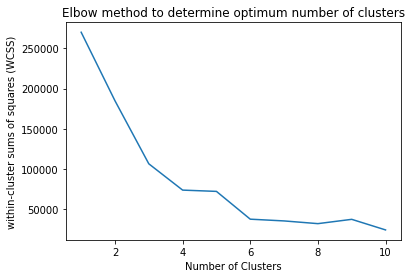

In [55]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

The idea is that we want a small WCSS, but that the WCSS tends to decrease toward 0 as we increase k (the WCSS is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low WCSS, and the elbow usually represents where we start to have diminishing returns by increasing k.

In [56]:
#Based on these observations we choose 5 as optimum number of clusters
K=5

Using the above generated function of K-Means Clustering for Classification


In [57]:
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

Visualising the Clusters and their Centroids

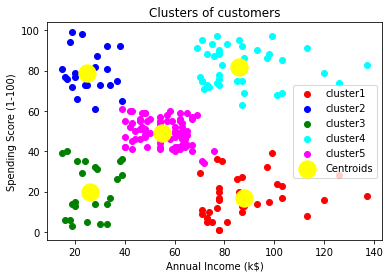

In [58]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Final Result